In [2]:
import pandas as pd
import numpy as np
import glob as gb
import os
import photonics.photodiode as fl
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


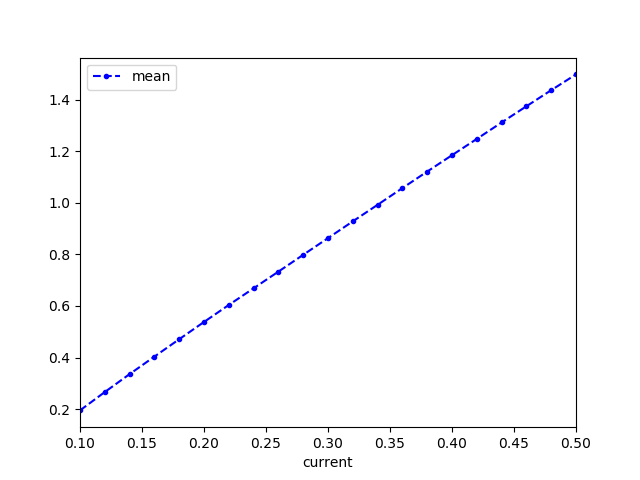

In [17]:
dataf ='../Data/'
directory = dataf + 'T22 Sweeps/intensity_vs_current/'
df = pd.read_hdf(directory + 'analysis.h5')
df.plot('current', 'mean', style=['b.--'])  # , yerr='std'

In [27]:
directory = dataf + 'T2 Sweeps/decay_vs_current/'
files = gb.glob(directory + '/Plots/*.npz')

<IPython.core.display.Javascript object>


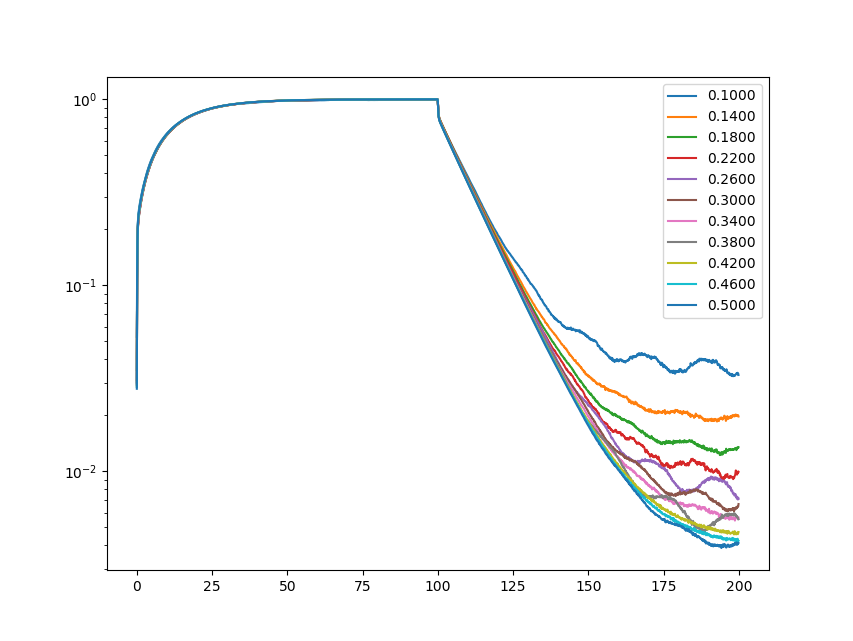

In [28]:
fig, ax = plt.subplots()
for f in files:
    data = np.load(f)
    x =  data['t']
    y =  data['data']
    y /= max(y)
    
    current = os.path.basename(f)
    current = os.path.splitext(current)[0]
    ax.plot(x, y, label=current)
    ax.set_yscale('log')
plt.legend()

In [24]:
c = []
taus = []
tau_r = []
std = []

print('Current\ttau\tstd\ttau_r\tstd')
for f in files:
    data = np.load(f)
    x =  data['t']
    y =  data['data']
    
    current = os.path.basename(f)
    current = float(os.path.splitext(current)[0])
    c.append(current)
    
    # Fit decay
    pump= 100
    # Reject data while pump is on
    xnew, ynew = fl.reject_time(x, y, reject_start=pump, reject_end=0)
    # Fit a single exp. decay function
    popt, perr = fl.fit_decay(xnew, ynew, p0=[max(y), 10, min(y)], print_out=False)
    tau = popt[1]
    taus.append(tau)
    tau_std = perr[1]
    std.append(tau_std)
    
    # Fit rise time
    # Reject data while pump is off
    xnew, ynew = fl.reject_time(x, y, reject_start=0, reject_end=(x[-1]-pump))
    # Fit a single exp. decay function
    popt, perr = fl.fit_rise(xnew, ynew, p0=[max(y), 10, min(y)], print_out=False)
    tau_r.append(popt[1])
    print('{:.2f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(current, tau, tau_std, popt[1], perr[1]))

Current	tau	std	tau_r	std
0.10	11.421	0.002	11.284	0.001
0.14	11.385	0.002	11.156	0.001
0.18	11.353	0.002	11.076	0.001
0.22	11.319	0.003	10.968	0.001
0.26	11.287	0.003	10.868	0.001
0.30	11.256	0.003	10.763	0.001
0.34	11.226	0.004	10.676	0.001
0.38	11.197	0.004	10.587	0.001
0.42	11.169	0.004	10.512	0.001
0.46	11.143	0.005	10.426	0.001
0.50	11.117	0.005	10.350	0.001


<IPython.core.display.Javascript object>


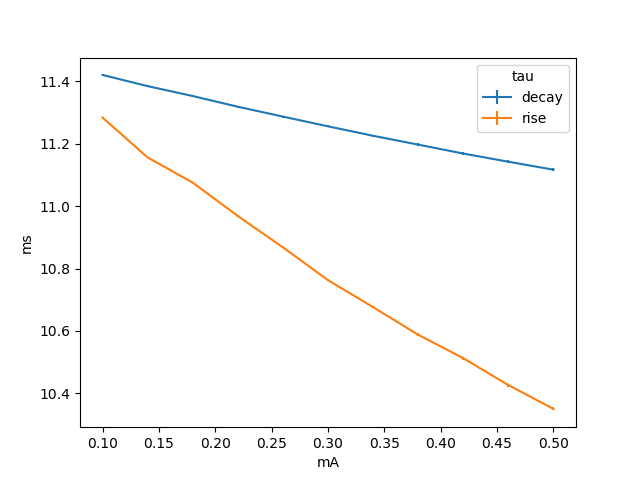

In [25]:
fix, ax = plt.subplots()
ax.errorbar(c, taus, yerr=std, label='decay')
ax.errorbar(c, tau_r, yerr=std, label='rise')
ax.set_xlabel('mA')
ax.set_ylabel('ms')
plt.legend(title='tau')